In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df=pd.read_csv("heart_2020_cleaned.csv")

In [123]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [124]:
hrt=df
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [125]:
for col in hrt:
  print(hrt[col].value_counts())


No     292422
Yes     27373
Name: HeartDisease, dtype: int64
26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
59.85       1
50.59       1
92.53       1
62.95       1
46.56       1
Name: BMI, Length: 3604, dtype: int64
No     187887
Yes    131908
Name: Smoking, dtype: int64
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64
No     307726
Yes     12069
Name: Stroke, dtype: int64
0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0        85
24.0        67
26.0        66
23.0        46
19.0        35
Name: PhysicalHealth, dtype: int64
0.0     205401
30.0     17373
2.0      16495
5.0      14149
10.0     105

In [126]:
hrt.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [127]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


# EDA


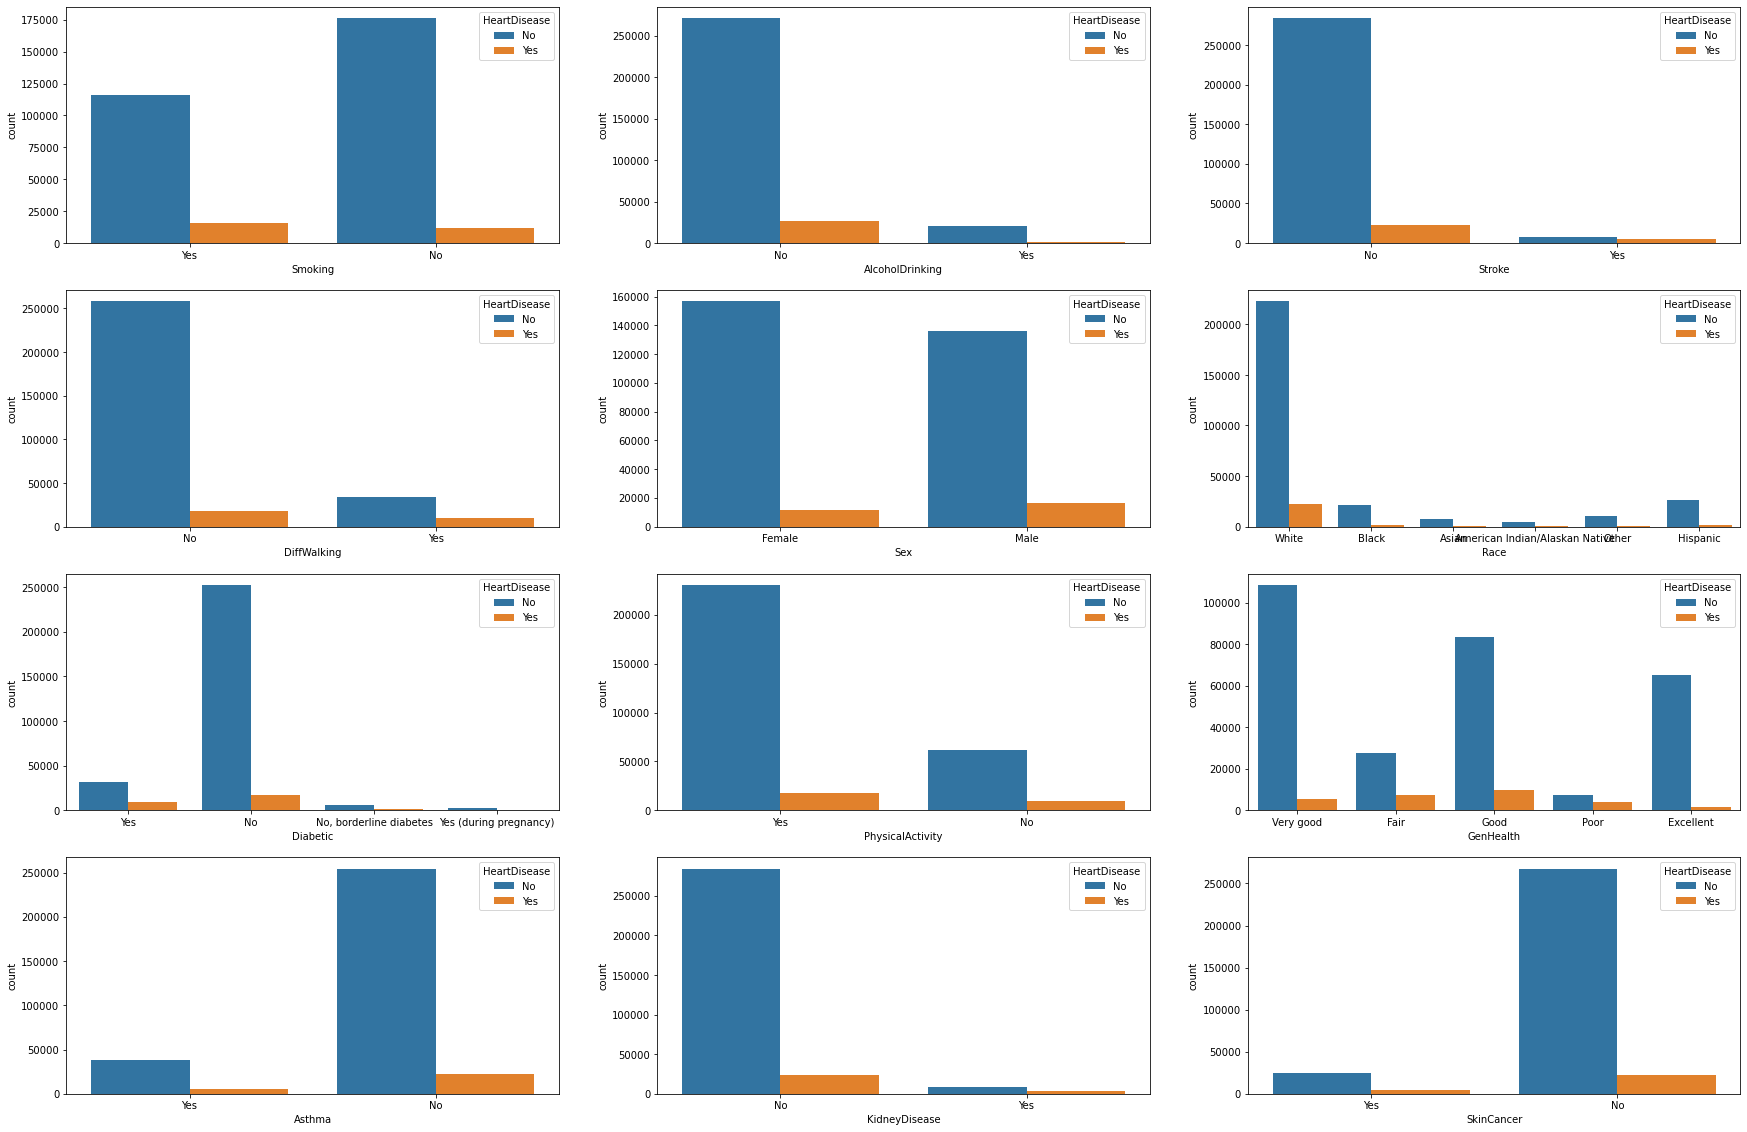

In [128]:
col=['Smoking', 'AlcoholDrinking', 'Stroke',
      'DiffWalking', 'Sex',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer']

fig=plt.figure(figsize=(30,20))
for i in range(0,len(col)):
    sub_plot=fig.add_subplot(4,3,i+1)
    sns.countplot(data=hrt,x=col[i],hue='HeartDisease')

From this we can deduce that patients with Difficulty in walking, Diabetes, bad Health,Had a Stroke in the Past, Kidney disease, Smoking Habit
have a high chance of having a Heart Disease.

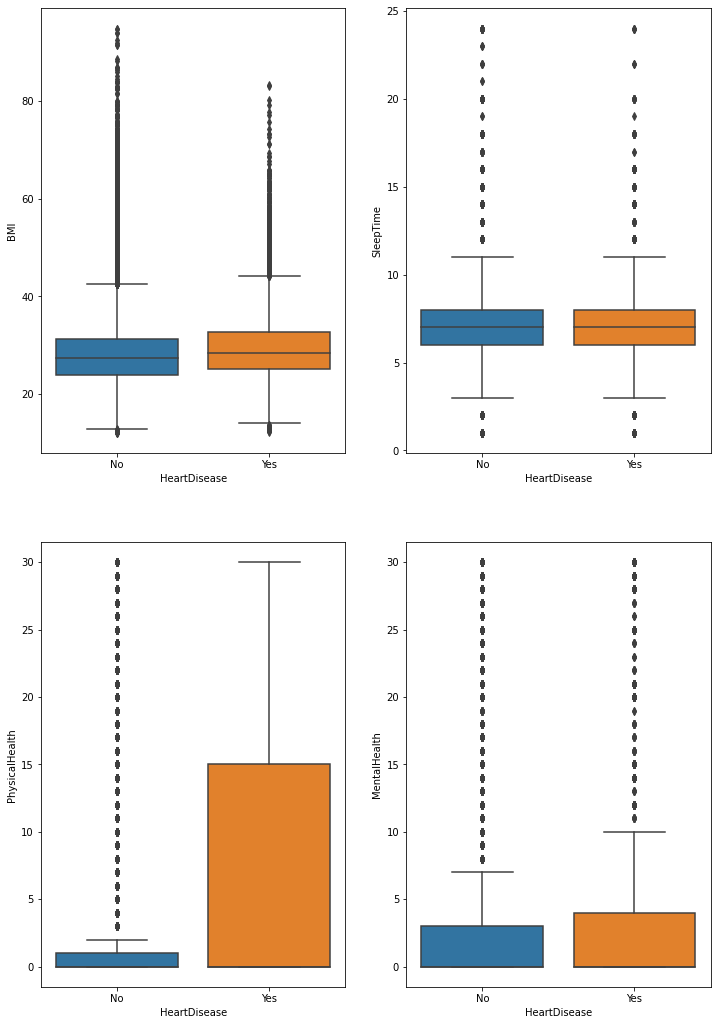

In [129]:
col=['BMI', 'SleepTime','PhysicalHealth', 'MentalHealth']
fig=plt.figure(figsize=(12,18))

for i in range(0,4):
    fig.add_subplot(2,2,i+1)
    sns.boxplot(x='HeartDisease', y=col[i], data=hrt)

From this we can clearly make out that physical health has the largest impact on Heart Disease. Also sleeptime doesn't have much of an impact on Heart Disease

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

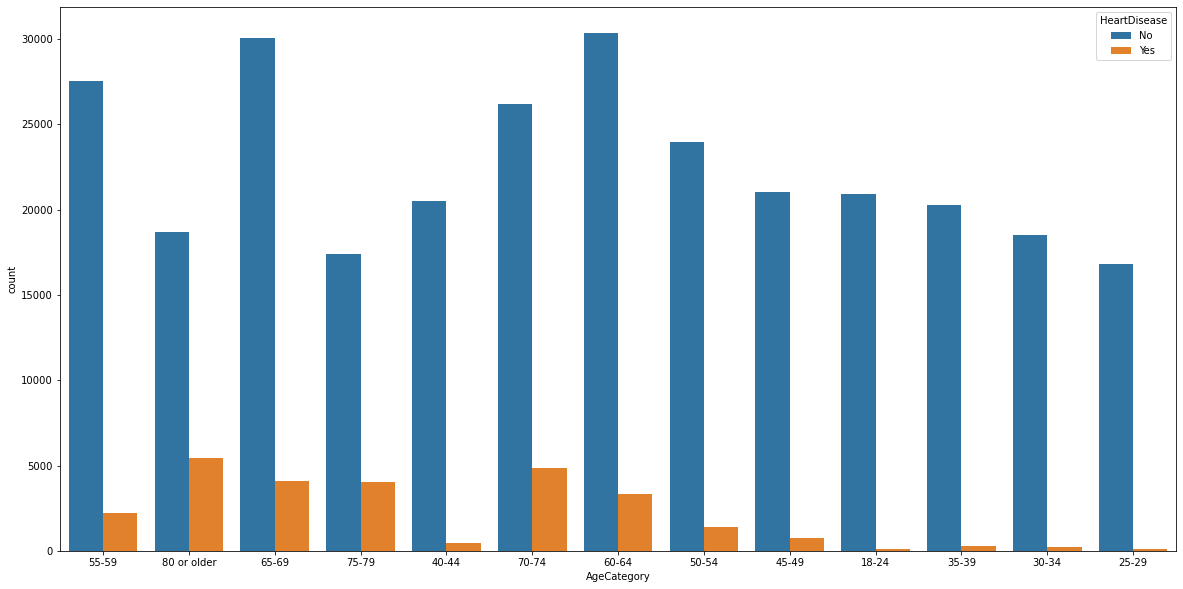

In [130]:
plt.figure(figsize=(20,10))
sns.countplot(x='AgeCategory', data=hrt, hue='HeartDisease')

From this we can deduce that the higher the age, higher is the chance of having hear disease

In [131]:
df['HeartDisease']=df['HeartDisease'].replace({'No':0,'Yes':1})

<AxesSubplot:>

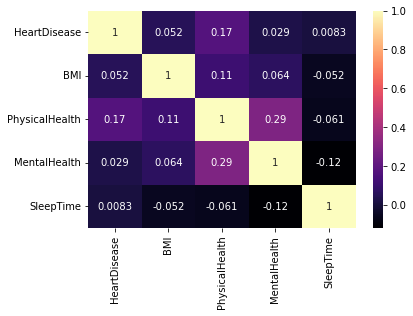

In [132]:
sns.heatmap(hrt.corr(), cmap="magma", annot=True)

From this heatmap our previous conclusion that physical health has the largest impact on heart disease is reaffirmed, also mental health clearly affects physical health, therefore it has a direct correlation with heart disease


# Logistic Regression


In [133]:
X = pd.get_dummies(hrt.drop('HeartDisease',axis=1))

In [134]:
y=hrt['HeartDisease']

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [136]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters = [{'solver': ['sag','saga','lbfgs']}]
gs = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                          n_jobs=-1)
gs.fit(X_train, y_train)
best_accuracy = gs.best_score_
best_parameters = gs.best_params_



C:\Users\shala\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [137]:
print(best_parameters)
print(100*best_accuracy)


{'solver': 'saga'}
91.62184636242287


In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
y_pred = gs.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87658
           1       0.55      0.10      0.18      8281

    accuracy                           0.92     95939
   macro avg       0.74      0.55      0.57     95939
weighted avg       0.89      0.92      0.89     95939



Text(33.0, 0.5, 'Actual_Values')

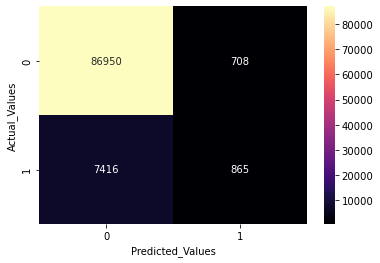

In [139]:
cm=confusion_matrix(y_test, y_pred)
plot_map=sns.heatmap(cm,annot=True,cmap='magma',fmt='g')
plot_map.set_xlabel('Predicted_Values')
plot_map.set_ylabel('Actual_Values')

In [140]:
import pickle
pickle_out = open("m.pkl", "wb")
pickle.dump(gs, pickle_out)
pickle_out.close()

In [141]:
X_test

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
76040,30.90,0.0,0.0,7.0,0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
223521,27.37,0.0,24.0,6.0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
155282,24.03,0.0,0.0,7.0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
19459,28.98,0.0,0.0,8.0,0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
74756,28.03,0.0,21.0,7.0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248482,28.48,0.0,1.0,7.0,0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,0,1
220945,28.25,0.0,0.0,8.0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
121450,30.04,0.0,5.0,5.0,0,1,1,0,1,0,...,0,0,0,1,0,1,1,0,1,0
104232,29.86,30.0,0.0,8.0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1


In [142]:
X_test.loc[271884]

BMI                                    27.63
PhysicalHealth                          0.00
MentalHealth                           25.00
SleepTime                               7.00
Smoking_No                              0.00
Smoking_Yes                             1.00
AlcoholDrinking_No                      1.00
AlcoholDrinking_Yes                     0.00
Stroke_No                               1.00
Stroke_Yes                              0.00
DiffWalking_No                          1.00
DiffWalking_Yes                         0.00
Sex_Female                              1.00
Sex_Male                                0.00
AgeCategory_18-24                       0.00
AgeCategory_25-29                       1.00
AgeCategory_30-34                       0.00
AgeCategory_35-39                       0.00
AgeCategory_40-44                       0.00
AgeCategory_45-49                       0.00
AgeCategory_50-54                       0.00
AgeCategory_55-59                       0.00
AgeCategor